In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [2]:
bst = load_boston()

In [3]:
X_full, y_full = bst.data, bst.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

In [4]:
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

In [5]:
 n_missing_samples

3289

In [6]:
missing_features = rng.randint(0, n_features, n_missing_samples)
missing_samples = rng.randint(0, n_samples, n_missing_samples)

In [7]:
missing_features

array([12,  5,  0, ..., 11,  0,  2])

In [8]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [9]:
X_missing[missing_samples, missing_features] = np.nan

In [21]:
X_missing
X_missing = pd.DataFrame(X_missing)

In [22]:
arr = np.arange(16).reshape(4,4)

In [23]:
arr[[1,2], [2,3]] = 0

In [24]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  0,  7],
       [ 8,  9, 10,  0],
       [12, 13, 14, 15]])

In [25]:
[1,2], [2,3]

([1, 2], [2, 3])

In [26]:
pd.DataFrame(X_missing)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.7,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.6,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.1,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,NaN,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,311.0,NaN,386.71,NaN


In [27]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)

In [28]:
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [29]:
X_missing_reg = X_missing.copy()
X_missing_reg.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,True,True,False,True,False,False,False,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,False,False
2,False,True,False,False,True,False,False,True,False,False,True,True,True
3,True,True,True,False,False,True,False,True,True,False,False,True,True
4,True,False,False,False,True,False,True,True,True,True,False,True,False
5,True,False,True,False,True,False,False,False,True,False,False,True,False
6,True,False,True,False,False,True,False,False,True,True,False,True,False
7,True,False,True,True,False,True,False,False,True,False,False,False,False
8,True,True,False,True,False,False,True,False,False,False,True,True,False
9,False,True,False,False,False,True,True,False,True,False,True,False,True


In [30]:
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

In [31]:
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11], dtype=int64)

In [33]:
X_missing_reg.isnull().sum(axis=0)

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [42]:
df = X_missing_reg
fillc = df.iloc[:, 6]
df = pd.concat([df.iloc[:,df.columns != 6], pd.DataFrame(y_full)], axis=1)
df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)
Ytrain = fillc[fillc.notnull()]
Ytest = fillc[fillc.isnull()]
Xtrain = df_0[Ytrain.index, :]
Xtest = df_0[Ytest.index, :]

In [48]:
rfc = RandomForestRegressor(n_estimators=100)
rfc = rfc.fit(Xtrain, Ytrain)
Ypredict = rfc.predict(Xtest)
X_missing_reg.loc[X_missing_reg.iloc[:, 6].isnull(), 6] = Ypredict

In [49]:
X_missing_reg

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.200,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.900,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.100,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.800,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,60.527,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.700,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.600,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.100,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,74.701,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,68.274,6.5921,NaN,311.0,NaN,386.71,NaN


In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [51]:
data = load_breast_cancer()

In [54]:
pd.DataFrame(data.data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [55]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [56]:
rfc = RandomForestClassifier(n_estimators=100, random_state=90)
score_pre = cross_val_score(rfc, data.data, data.target, cv=10, scoring='accuracy').mean()
score_pre

0.9648809523809524

0.9666353383458647 73


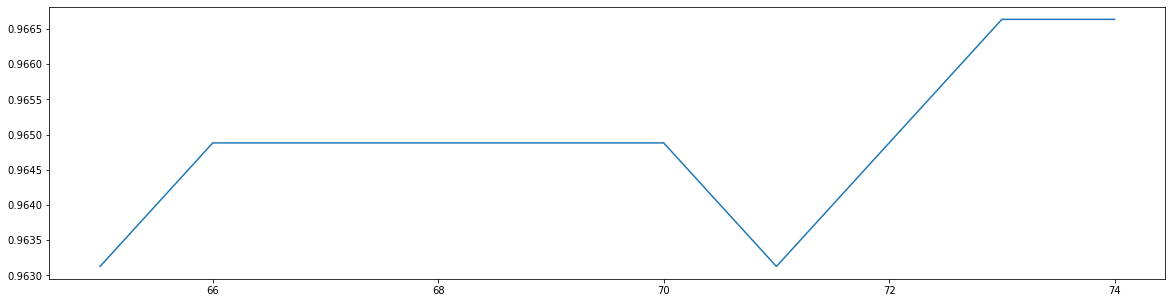

In [65]:
scorel = list()
for i in range(65, 75, 1):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1, random_state=90)
    score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
    scorel.append(score)
print(max(scorel), ([*range(65, 75)][scorel.index(max(scorel))]))
plt.figure(figsize=[20, 5])
plt.plot(range(65, 75, 1), scorel)
plt.show()